Data Analysis

In [ ]:
!wget https://dblp.uni-trier.de/xml/dblp.xml.gz
!wget https://dblp.uni-trier.de/xml/dblp.dtd
!gzip -d dblp.xml.gz
!pip3 install pdfkit
!pip3 install PyPDF2
!pip3 install nltk
!pip3 install xml-python
!pip3 install lxml


--2023-10-30 16:41:07--  https://dblp.uni-trier.de/xml/dblp.xml.gz
Resolving dblp.uni-trier.de (dblp.uni-trier.de)... 136.199.55.186
Connecting to dblp.uni-trier.de (dblp.uni-trier.de)|136.199.55.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 819035694 (781M) [application/x-gzip]
Saving to: ‘dblp.xml.gz’

dblp.xml.gz         100%[===================>] 781.09M  34.0MB/s    in 24s     

2023-10-30 16:41:33 (32.2 MB/s) - ‘dblp.xml.gz’ saved [819035694/819035694]

--2023-10-30 16:41:33--  https://dblp.uni-trier.de/xml/dblp.dtd
Resolving dblp.uni-trier.de (dblp.uni-trier.de)... 136.199.55.186
Connecting to dblp.uni-trier.de (dblp.uni-trier.de)|136.199.55.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13134 (13K) [application/xml-dtd]
Saving to: ‘dblp.dtd’

dblp.dtd            100%[===================>]  12.83K  --.-KB/s    in 0.04s   

2023-10-30 16:41:34 (328 KB/s) - ‘dblp.dtd’ saved [13134/13134]

     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!wget https://dblp.uni-trier.de/xml/dblp.xml.gz
!wget https://dblp.uni-trier.de/xml/dblp.dtd
!gzip -d dblp.xml.gz
!pip3 install nltk -q
!pip3 install lxml -q

--2023-10-30 16:46:39--  https://dblp.uni-trier.de/xml/dblp.xml.gz
Resolving dblp.uni-trier.de (dblp.uni-trier.de)... 136.199.55.186
Connecting to dblp.uni-trier.de (dblp.uni-trier.de)|136.199.55.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 819035694 (781M) [application/x-gzip]
Saving to: ‘dblp.xml.gz’

dblp.xml.gz         100%[===================>] 781.09M  15.5MB/s    in 70s     

2023-10-30 16:47:49 (11.2 MB/s) - ‘dblp.xml.gz’ saved [819035694/819035694]

--2023-10-30 16:47:49--  https://dblp.uni-trier.de/xml/dblp.dtd
Resolving dblp.uni-trier.de (dblp.uni-trier.de)... 136.199.55.186
Connecting to dblp.uni-trier.de (dblp.uni-trier.de)|136.199.55.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13134 (13K) [application/xml-dtd]
Saving to: ‘dblp.dtd.1’

dblp.dtd.1          100%[===================>]  12.83K  --.-KB/s    in 0.04s   

2023-10-30 16:47:50 (324 KB/s) - ‘dblp.dtd.1’ saved [13134/13134]

gzip: dblp.xml already exi

In [ ]:
!pip3 install pdfkit
!pip3 install PyPDF2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


### PART 1: Domain specific dataset analysis

In [ ]:
from PyPDF2 import PdfReader
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import itertools
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import random
from nltk.tag import pos_tag

import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
# Download the stop words if necessary
nltk.download('stopwords')
# Get the English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_path = '/content/drive/MyDrive/Assignment/TDM - Assignment/part1/'
domain_name = os.listdir(folder_path)
domain_name = [x for x in domain_name if x[0]!='.']
domain_name

['computervision', 'flutter', 'travelblogs']

In [ ]:
all_domain_text = []
meta_df = pd.DataFrame(columns=['Domain', 'File_name', 'Number_of_pages', 'Number_of_characters'])

for domain in domain_name:
    domain_text = []
    for file_name in os.listdir(folder_path+domain):
        pdf_file = folder_path+domain+'/'+file_name

        reader = PdfReader(pdf_file)
        number_of_pages = len(reader.pages)
        text = ''
        for i in range(number_of_pages):
            page = reader.pages[i]
            text += re.sub('\s+', ' ', page.extract_text()).strip()

        domain_text.append(text)
        meta_df.loc[len(meta_df)] = [domain, file_name, len(reader.pages), len(text)]
        # break
    all_domain_text.append(domain_text)
    # break

In [ ]:
meta_df.head(20)

,Domain,File_name,Number_of_pages,Number_of_characters
0,computervision,Xu_Scene_Graph_Generation_CVPR_2017_paper.pdf,10,44103
1,computervision,Jianwei_Yang_Graph_R-CNN_for_ECCV_2018_paper.pdf,16,45250
2,computervision,Tang_Unbiased_Scene_Graph_Generation_From_Bias...,10,49283
3,computervision,Li_Scene_Graph_Generation_ICCV_2017_paper.pdf,10,46120
4,computervision,EasyChair-Preprint-3385.pdf,19,123420
5,computervision,2201.00443.pdf,27,167548
6,computervision,Liu_Fully_Convolutional_Scene_Graph_Generation...,11,53778
7,computervision,Li_High_Performance_Visual_CVPR_2018_paper.pdf,10,43121
8,computervision,Peng_Tang_Weakly_Supervised_Region_ECCV_2018_p...,17,48508
9,computervision,NIPS-2015-faster-r-cnn-towards-real-time-objec...,9,36003


#### Tokenization

In [ ]:
import pandas as pd
import re
import itertools
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Assuming you have already imported necessary libraries and defined stop_words

token_df = pd.DataFrame(columns=['Domain', 'Total_number_of_tokens', 'Total_number_of_filtered_tokens', 'Top_1000_Token'])
new_df = pd.DataFrame(columns=['Domain', 'Corpus'])
length_dist = FreqDist()

for domain, domain_text in zip(domain_name, all_domain_text):
    text = ''.join(list(itertools.chain.from_iterable(domain_text)))
    text = re.sub(r'\W+', ' ', text).lower()

    text2 = ''.join(list(itertools.chain.from_iterable(domain_text)))
    # Tokenize the text into sentences
    sentences = sent_tokenize(text2)

    # Append each sentence and its length to new_df
    for sentence in sentences:
        new_df = new_df.append({'Domain': domain, 'Corpus': sentence}, ignore_index=True)

    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove any stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Get the length of each filtered word and update the frequency distribution
    for word in filtered_words:
        length_dist[len(word)] += 1
    # Create a frequency distribution of the remaining words
    freq_dist = FreqDist(filtered_words)
    # Select the top 1000 tokens
    top_1000_tokens = [token for token, count in freq_dist.most_common(1000)]

    token_df.loc[len(token_df)] = [domain, len(words), len(filtered_words), top_1000_tokens]

token_df
new_df


,Domain,Corpus
0,computervision,Scene Graph Generation by Iterative Message Pa...
1,computervision,Relationships between ob- jects also constitut...
2,computervision,"In this work, we explicitly model the objects ..."
3,computervision,We propose a novel end- to-end model that gene...
4,computervision,The model solves the scene graph inference pro...
...,...,...
7493,travelblogs,Kodaikanal is also known as the “Princess of h...
7494,travelblogs,Book memorable holidays on TravelTriangle with...
7495,travelblogs,People Also Read: Ooty Travel Tips Best Touris...
7496,travelblogs,Packages By Theme Domestic Tour Packages Packa...


In [ ]:
print(text2)

Chennai To Pondicherry Road Trip: All You Need To Know For Your Next Vacay Written by TravelTriangle Staff Search Embarking on the Chennai to Pondicherry road trip , and traversing through time and culture, this expedition takes you where the modernity of Tamil Nadu’s capital city seamlessly merges along the charm of Pondicherry. This 150- kilometre drive along the East Coast Road (ECR) purveys an unforgettable excursion for travellers seeking a blend of history, nature, and coastal life.About Chennai To Pondicherry Road Trip Chennai To Pondicherry Route Image Source: Shutterstock The road trip commences in Chennai, a bustling metropolis known for its rich heritage and contemporary allures. It unveils picturesque coastal landscapes and as you drive along ECR, the Bay of Bengal glistens on one side while lush greenery lines the other. The route also offers opportunities to explore tourist gems, especially Mahabalipuram. The journey culminates in Pondicherry, a former French colony that 

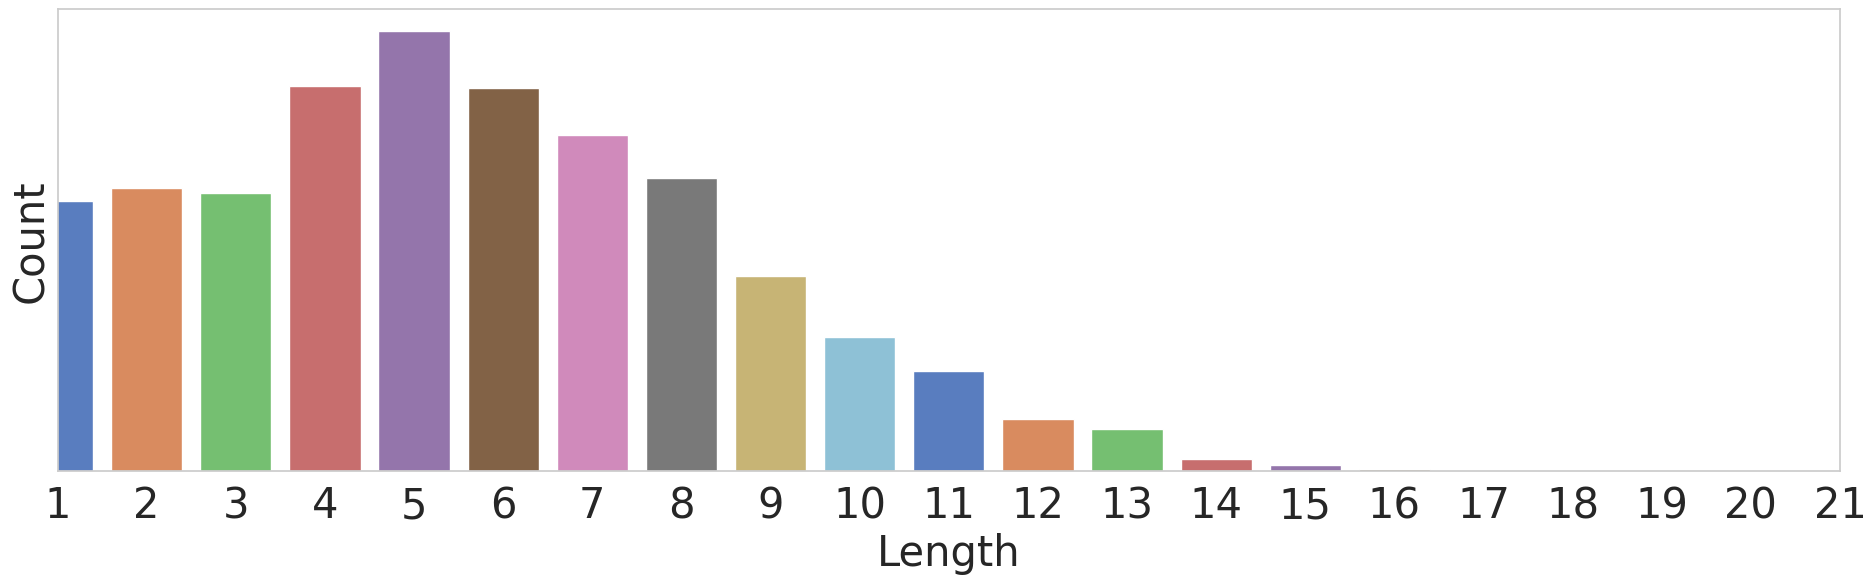

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(list(length_dist.items()), columns=['Length', 'Count'])
df.sort_values(by='Length', inplace=True)

plt.figure(figsize=(23, 6))
sns.set_theme(style="whitegrid")

colors = sns.color_palette("muted", len(df))

ax = sns.barplot(x='Length', y='Count', data=df, palette=colors)


plt.xlabel('Length', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.xticks(rotation=0, fontsize=30)  # Increase font size for x-axis labels
ax.yaxis.set_major_locator(plt.NullLocator())  # Remove y-axis labels

# Limit x-axis to 20
plt.xlim(0, 20)

plt.show()


#### Stemming ( adjust x-axis for better visualization)

In [ ]:
# Create a stemmer object
# stemmer = PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('english')
token_stemmed_df = pd.DataFrame(columns = ['Domain', 'Total_number_of_tokens', 'Total_number_of_filtered_token', 'Total_number_of_stemmed_tokens', 'Top_1000_Token'])

length_stemmed_dist = FreqDist()
for domain, domain_text in list(zip(domain_name,all_domain_text)):
    text = ''.join(list(itertools.chain.from_iterable(domain_text)))
    text = re.sub(r'\W+', ' ', text).lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove any stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Stem each word in the list of filtered words
    stemmed_words = list(set([stemmer.stem(word) for word in filtered_words]))
    # Get the length of each filtered word and update the frequency distribution
    for word in stemmed_words:
        length_stemmed_dist[len(word)] += 1
    # Create a frequency distribution of the remaining words
    freq_dist = FreqDist(stemmed_words)
    # Select the top 1000 tokens
    top_1000_tokens = [token for token, count in freq_dist.most_common(1000)]

    token_stemmed_df.loc[len(token_stemmed_df)] = [domain, len(words), len(filtered_words), len(stemmed_words), top_1000_tokens]
    # break

token_stemmed_df

,Domain,Total_number_of_tokens,Total_number_of_filtered_token,Total_number_of_stemmed_tokens,Top_1000_Token
0,computervision,109916,77801,7859,"[minimum, email, handong, dictionari, vectorss..."
1,flutter,14994,11010,1433,"[email, doubl, pixel, quot, awt, parent, drawe..."
2,travelblogs,20843,12686,2573,"[minimum, buddi, mandatori, bonfir, doubl, fal..."


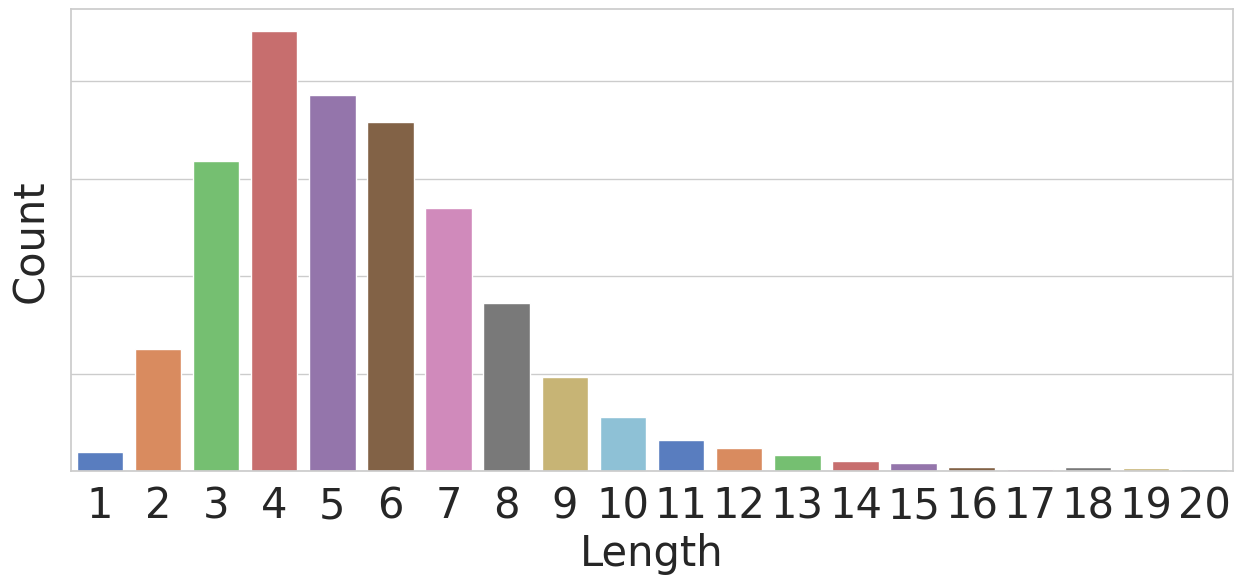

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code
df = pd.DataFrame(list(length_stemmed_dist.items()), columns=['Length', 'Count'])
df.sort_values(by='Length', inplace=True)

# Filter data to include only the first 20 values
df = df.head(20)

# New styling and scaling
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")  # Adding a white grid background for a clean look

# Custom color palette for a more pleasing appearance
colors = sns.color_palette("muted", len(df))

# Your existing plot code
ax = sns.barplot(x='Length', y='Count', data=df, palette=colors)

# Removing count labels from each bar
ax.set(yticklabels=[])

# Adding labels and title

plt.xlabel('Length', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.xticks(rotation=0,fontsize=30)  # Rotating x-axis labels for better readability

# Display the plot
plt.show()


#### Sentence Segmentation ( adjust x-axis for better visualization)

Streaming output truncated to the last 5000 lines.
Domain: computervision, Sentence 2499 - Number of Words: 23
Domain: computervision, Sentence 2500 - Number of Words: 8
Domain: computervision, Sentence 2501 - Number of Words: 30
Domain: computervision, Sentence 2502 - Number of Words: 20
Domain: computervision, Sentence 2503 - Number of Words: 20
Domain: computervision, Sentence 2504 - Number of Words: 9
Domain: computervision, Sentence 2505 - Number of Words: 21
Domain: computervision, Sentence 2506 - Number of Words: 26
Domain: computervision, Sentence 2507 - Number of Words: 23
Domain: computervision, Sentence 2508 - Number of Words: 29
Domain: computervision, Sentence 2509 - Number of Words: 27
Domain: computervision, Sentence 2510 - Number of Words: 38
Domain: computervision, Sentence 2511 - Number of Words: 12
Domain: computervision, Sentence 2512 - Number of Words: 23
Domain: computervision, Sentence 2513 - Number of Words: 24
Domain: computervision, Sentence 2514 - Number of W

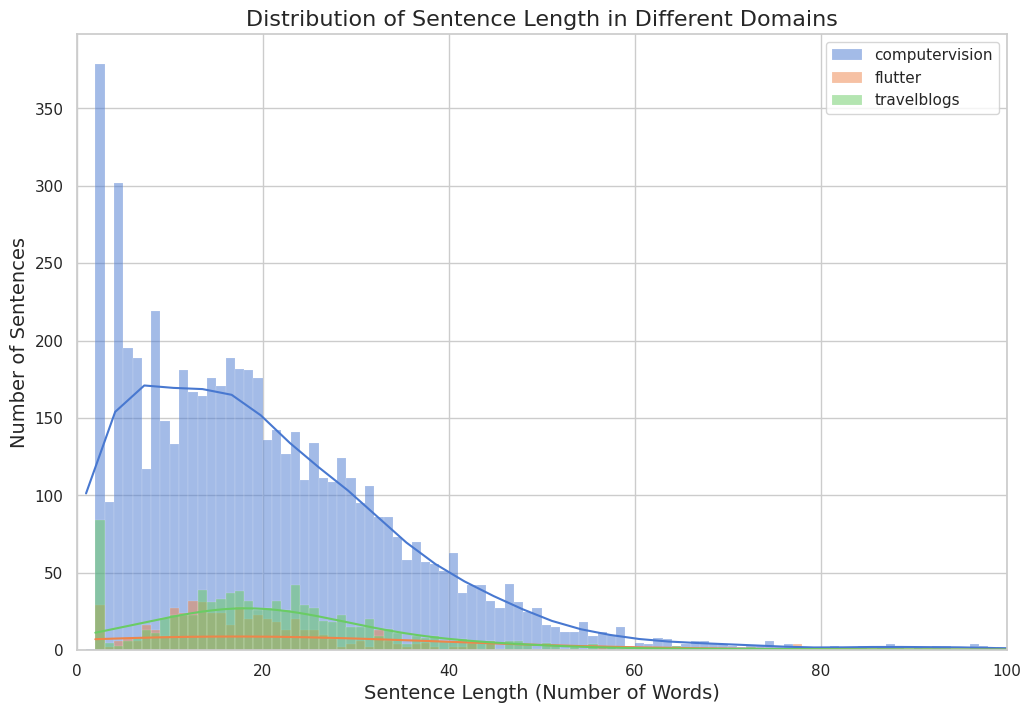

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import seaborn as sns

# Assuming you have already imported necessary libraries and defined new_df

# Create a new DataFrame to store the sentence length distribution
sentence_length_dist_df = pd.DataFrame(columns=['Domain', 'Sentence_Length'])

for domain in new_df['Domain'].unique():
    domain_sentences = new_df[new_df['Domain'] == domain]['Corpus']

    # Tokenize each sentence to count the number of words
    sentence_word_counts = [len(word_tokenize(sentence)) for sentence in domain_sentences]

    # Print number of words for each sentence
    for i, sentence in enumerate(domain_sentences):
        print(f"Domain: {domain}, Sentence {i + 1} - Number of Words: {len(word_tokenize(sentence))}")

    sentence_length_dist_df = sentence_length_dist_df.append({'Domain': domain, 'Sentence_Length': sentence_word_counts}, ignore_index=True)

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 8))  # Increased size here

# Plot histograms for each domain
for domain in new_df['Domain'].unique():
    domain_data = sentence_length_dist_df[sentence_length_dist_df['Domain'] == domain]

    # Flatten the 'Sentence_Length' column
    all_lengths = [length for lengths in domain_data['Sentence_Length'] for length in lengths]

    # Use seaborn to plot a histogram with a KDE (Kernel Density Estimate) line
    sns.histplot(all_lengths, bins=range(0, min(100, max(all_lengths)) + 1), kde=True, label=domain, alpha=0.5, ax=ax)

# Set x-axis limit to 100
ax.set_xlim(0, 100)

plt.xlabel('Sentence Length (Number of Words)', fontsize=14)  # Increased x-axis label size
plt.ylabel('Number of Sentences', fontsize=14)  # Increased y-axis label size
plt.title('Distribution of Sentence Length in Different Domains', fontsize=16)  # Increased title size
plt.legend()
plt.show()


In [ ]:
for domain, domain_text in list(zip(domain_name,all_domain_text)):
    text = ''.join(list(itertools.chain.from_iterable(domain_text)))
    sentences = sent_tokenize(text)

    for _ in range(3):
        sentence = random.choice(sentences)
        sentence = re.sub(r'\W+', ' ', sentence)
        words = word_tokenize(sentence)
        pos_tags = pos_tag(words)
        print(f'{domain}: {pos_tags}')
    print('')

computervision: [('Russakovsky', 'NNP'), ('O', 'NNP'), ('Deng', 'NNP'), ('J', 'NNP'), ('Su', 'NNP'), ('H', 'NNP'), ('Krause', 'NNP'), ('J', 'NNP'), ('Satheesh', 'NNP'), ('S', 'NNP'), ('Ma', 'NNP'), ('S', 'NNP'), ('Huang', 'NNP'), ('Z', 'NNP'), ('Karpathy', 'NNP'), ('A', 'NNP'), ('Khosla', 'NNP'), ('A', 'NNP'), ('Bernstein', 'NNP'), ('M', 'NNP'), ('et', 'FW'), ('al', 'NN')]
computervision: [('The', 'DT'), ('network', 'NN'), ('in', 'IN'), ('38', 'CD'), ('has', 'VBZ'), ('a', 'DT'), ('multiple', 'JJ'), ('instance', 'NN'), ('learning', 'NN'), ('stream', 'NN'), ('which', 'WDT'), ('is', 'VBZ'), ('trained', 'VBN'), ('by', 'IN'), ('an', 'DT'), ('image', 'NN'), ('classiﬁcation', 'NN'), ('loss', 'NN'), ('and', 'CC'), ('some', 'DT'), ('instance', 'NN'), ('c', 'VBD'), ('las', 'JJ'), ('siﬁer', 'JJ'), ('reﬁnement', 'NN'), ('streams', 'NNS'), ('which', 'WDT'), ('encourage', 'VBP'), ('category', 'JJ'), ('coherence', 'NN'), ('among', 'IN'), ('spati', 'JJ'), ('ally', 'RB'), ('adjacent', 'JJ'), ('proposal